In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('matches.csv')
df.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [6]:
df.describe(include=['object'])

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over,method,umpire1,umpire2
count,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1095,21,1095,1095
unique,17,36,823,8,291,58,19,19,19,2,19,4,2,1,62,62
top,2013,Mumbai,2017-04-09,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,AK Chaudhary,S Ravi
freq,76,173,2,1029,25,77,135,138,143,704,144,578,1081,21,115,83


In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
df.shape

(1095, 20)

In [9]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [10]:
df.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [11]:
df.method.unique()

array([nan, 'D/L'], dtype=object)

In [12]:
df.method=df.method.fillna('Normal')

In [13]:
df.method.unique()

array(['Normal', 'D/L'], dtype=object)

In [14]:
df.isnull().sum()

id                  0
season              0
city               51
date                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              5
result              0
result_margin      19
target_runs         3
target_overs        3
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [16]:
### data analysis
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1095, dtype: bool

# 1.Most Succesfull team in league and playoffs combined


In [17]:
df_win=df.groupby(['winner']).size().reset_index().rename(columns={0:'Win Count'}).sort_values(by='Win Count',ascending=False)
df_win

,winner,Win Count
10,Mumbai Indians,144
0,Chennai Super Kings,138
8,Kolkata Knight Riders,131
16,Royal Challengers Bangalore,116
13,Rajasthan Royals,112
6,Kings XI Punjab,88
18,Sunrisers Hyderabad,88
3,Delhi Daredevils,67
2,Delhi Capitals,48
1,Deccan Chargers,29


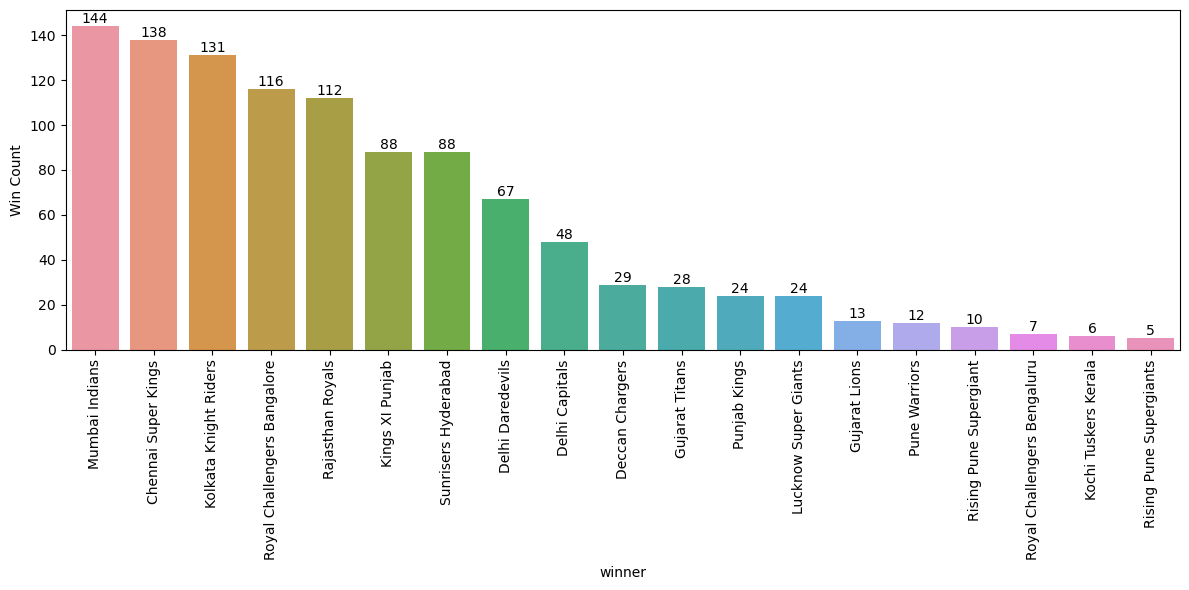

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='winner', y='Win Count', data=df_win, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2.Which toss decision (batting first or bowling first) results in more wins in the IPL?

In [19]:
df_win_result=df.groupby(['result']).size().reset_index().rename(columns={0:'Win Count'}).sort_values(by='Win Count',ascending=False)
df_win_result

,result,Win Count
3,wickets,578
1,runs,498
2,tie,14
0,no result,5


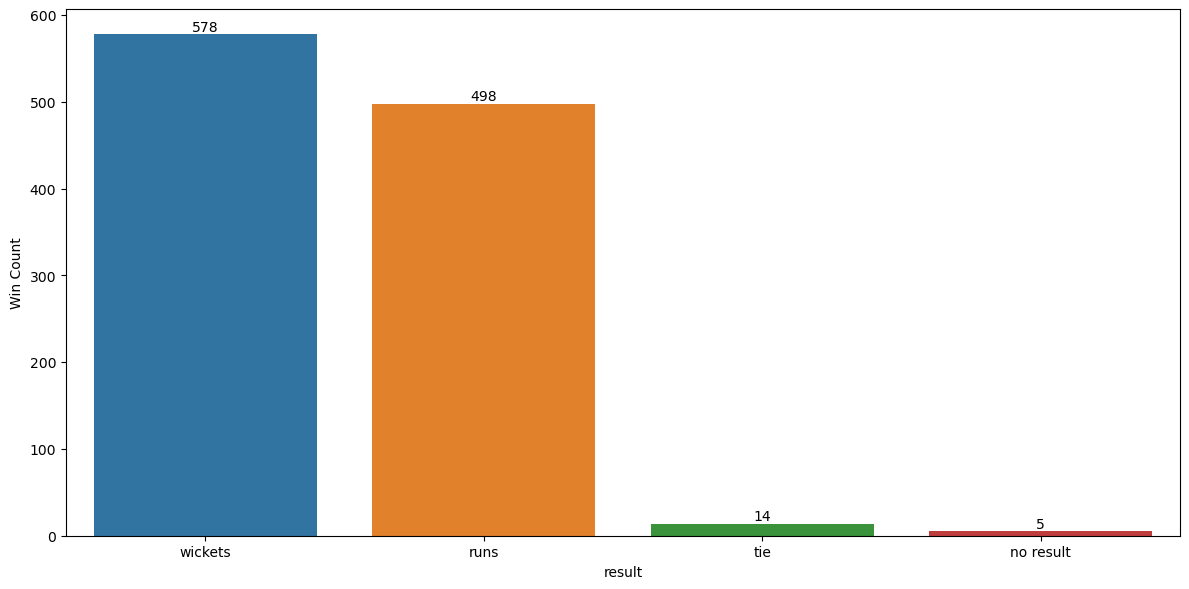

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='result', y='Win Count', data=df_win_result, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

# 3.Which player won the most player of the match award?


In [21]:
df_win_mom=df.groupby(['player_of_match']).size().reset_index().rename(columns={0:'Won'}).sort_values(by='Won',ascending=False)
df_win_mom


,player_of_match,Won
11,AB de Villiers,25
43,CH Gayle,22
214,RG Sharma,19
53,DA Warner,18
276,V Kohli,18
...,...,...
136,M Jansen,1
137,M Kartik,1
146,MA Wood,1
148,MD Mishra,1


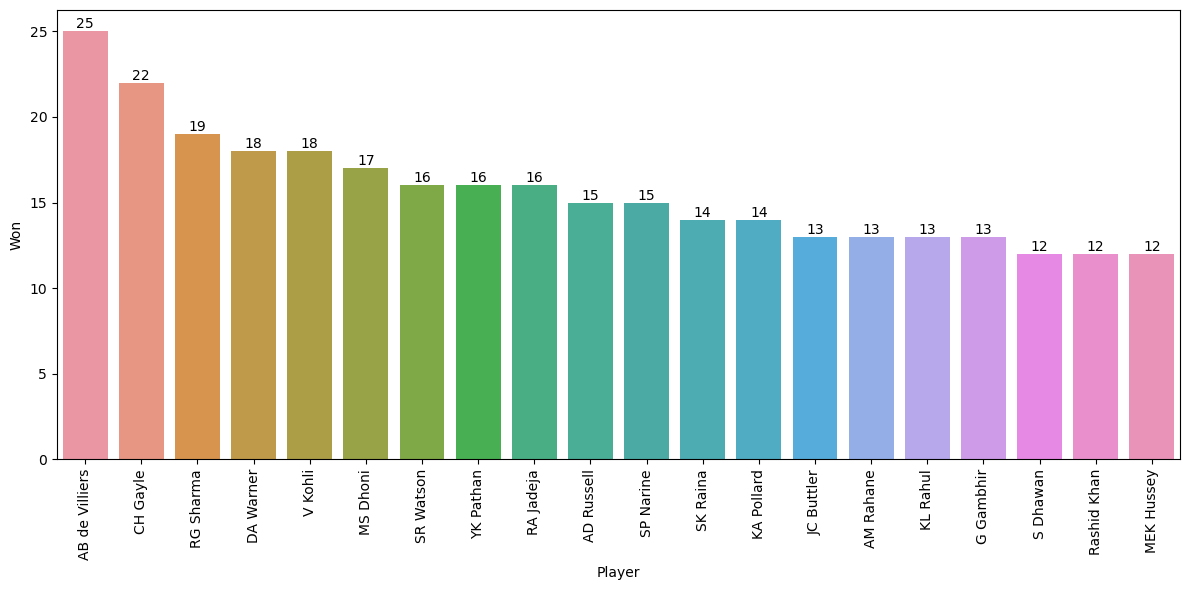

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x=df_win_mom['player_of_match'].iloc[0:20], y=df_win_mom['Won'].iloc[0:20], data=df_win_mom, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.tight_layout()
plt.show()

# 4.which venue has held highest number of matches?


In [23]:
df_venue=df['venue'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'venue','venue':'matches held'})
df_venue

,venue,matches held
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Wankhede Stadium, Mumbai",45
9,"Punjab Cricket Association Stadium, Mohali",35


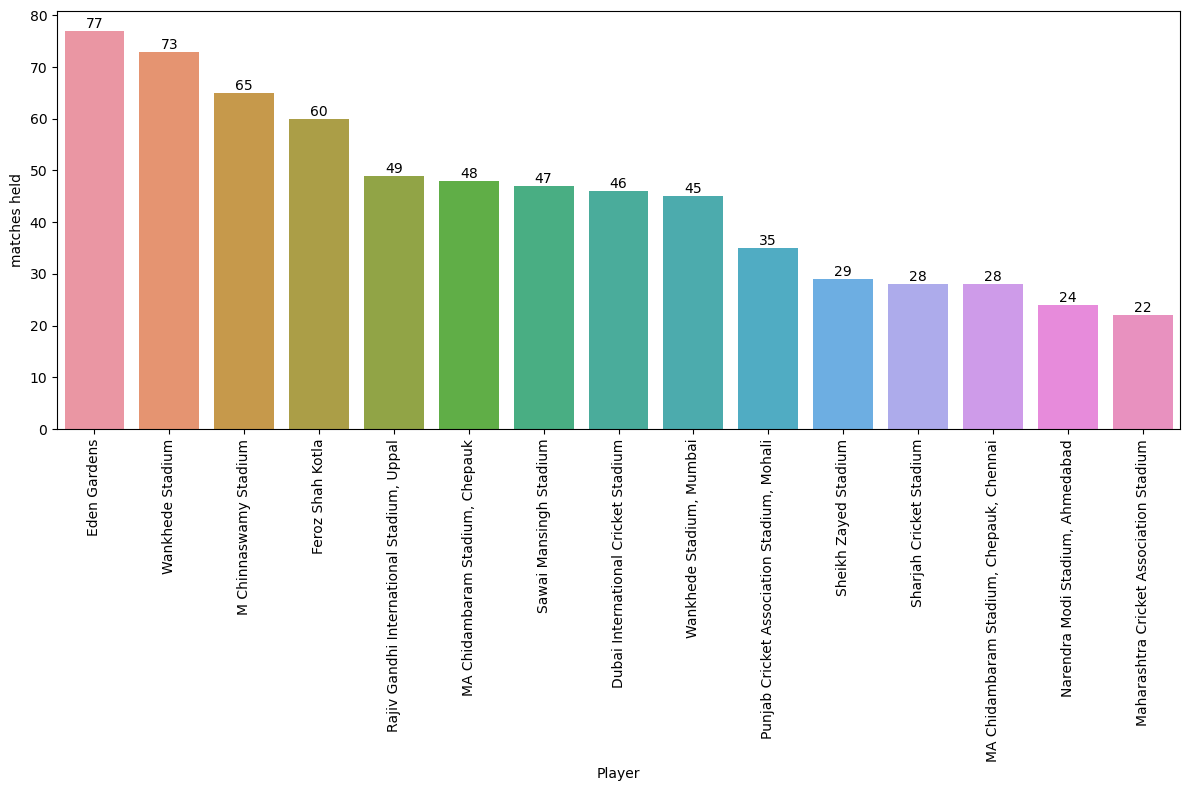

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x=df_venue['venue'].iloc[0:15], y=df_venue['matches held'].iloc[0:15], data=df_venue, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.tight_layout()
plt.show()

# 5.Which team has the best performance in high-pressure matches (finals and semi-finals)?


In [27]:
df['match_type'].unique()

array(['League', 'Semi Final', 'Final', '3rd Place Play-Off',
       'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator'],
      dtype=object)

In [28]:
df_knockout=df.loc[df['match_type'].isin(['Semi Final', 'Final', '3rd Place Play-Off',
       'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator'])]
df_knockout


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
55,336038,2007/08,Mumbai,2008-05-30,Semi Final,SR Watson,Wankhede Stadium,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,field,Rajasthan Royals,runs,105.0,193.0,20.0,N,Normal,BF Bowden,RE Koertzen
56,336039,2007/08,Mumbai,2008-05-31,Semi Final,M Ntini,Wankhede Stadium,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,bat,Chennai Super Kings,wickets,9.0,113.0,20.0,N,Normal,Asad Rauf,DJ Harper
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal,BF Bowden,RE Koertzen
112,392237,2009,Centurion,2009-05-22,Semi Final,AC Gilchrist,SuperSport Park,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,6.0,154.0,20.0,N,Normal,BR Doctrove,DJ Harper
113,392238,2009,Johannesburg,2009-05-23,Semi Final,MK Pandey,New Wanderers Stadium,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,6.0,147.0,20.0,N,Normal,RE Koertzen,SJA Taufel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1370353,2023,Ahmedabad,2023-05-29,Final,DP Conway,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,Normal,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,Normal,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Normal,Nitin Menon,VK Sharma


In [29]:
df_knock_value=df_knockout['winner'].value_counts().sort_values(ascending=False)
df_knock_value

Chennai Super Kings            17
Mumbai Indians                 13
Kolkata Knight Riders          10
Royal Challengers Bangalore     6
Sunrisers Hyderabad             6
Rajasthan Royals                5
Gujarat Titans                  3
Deccan Chargers                 2
Delhi Capitals                  2
Kings XI Punjab                 1
Rising Pune Supergiant          1
Name: winner, dtype: int64

([<matplotlib.patches.Wedge at 0x20f01d0ad70>,
 [Text(0.8280948334907875, 0.8684808269304884, 'Chennai Super Kings'),
  Text(-0.6799748615373915, 0.8646584225445361, 'Mumbai Indians'),
  Text(-1.0801215658077121, -0.20817637492543753, 'Kolkata Knight Riders'),
  Text(-0.6380625751062826, -0.8960335653583182, 'Royal Challengers Bangalore'),
  Text(-0.05234005752840445, -1.098754075477276, 'Sunrisers Hyderabad'),
  Text(0.5040492335402766, -0.9777189627737921, 'Rajasthan Royals'),
  Text(0.8313245839052956, -0.7203467471951875, 'Gujarat Titans'),
  Text(0.9777190335625251, -0.5040490962292881, 'Deccan Chargers'),
  Text(1.055442297353649, -0.30990572269135586, 'Delhi Capitals'),
  Text(1.0888036000597223, -0.1565462247931533, 'Kings XI Punjab'),
  Text(1.0987540779274896, -0.05234000609201452, 'Rising Pune Supergiant')],
 [Text(0.6555750765135401, 0.68754732131997, '25.8%'),
  Text(-0.5254351202788934, 0.668145144693505, '19.7%'),
  Text(-0.8346393917605047, -0.16086356244238353, '15.2%'

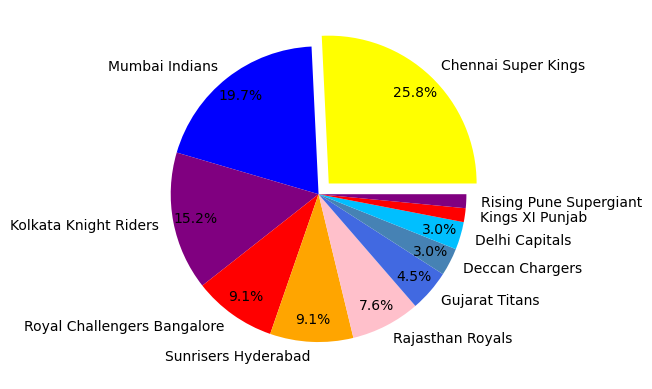

In [67]:
explode=[0.1,0,0,0,0,0,0,0,0,0,0]
plt.pie(df_knock_value,labels=df_knock_value.index,colors = ['Yellow','Blue','Purple','Red','Orange','Pink','royalblue','steelblue','deepskyblue','Red','Purple'], autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',pctdistance=0.85,textprops={'fontsize': 10},explode=explode)

# 6.Which season had the highest number of matches decided by a Super Over?

In [31]:
#### handling season columns
df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [32]:
season_mapping = {'2007/08': '2008', '2009/10': '2010', '2020/21': '2020'}
df['season'] = df['season'].map(season_mapping).fillna(df['season'])
df['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [33]:
df_super=df.loc[df['super_over']=='Y']
df_super_count=df_super['season'].value_counts().sort_values(ascending=True)
df_super_count

2009    1
2010    1
2014    1
2015    1
2017    1
2021    1
2013    2
2019    2
2020    4
Name: season, dtype: int64

Text(0, 0.5, 'Number of matches')

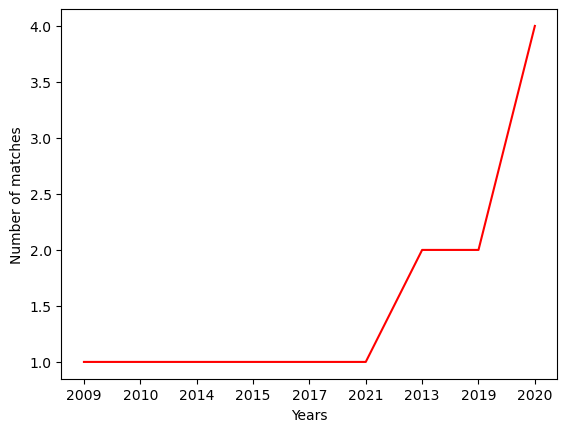

In [34]:
plt.plot(df_super_count.index,df_super_count.values,'r')
plt.xlabel('Years')
plt.ylabel('Number of matches')

# 7.How does the match result vary with different target runs?

In [65]:
df[['result_margin','target_runs']]

,result_margin,target_runs
0,140.0,223.0
1,33.0,241.0
2,9.0,130.0
3,5.0,166.0
4,5.0,111.0
...,...,...
1090,4.0,215.0
1091,8.0,160.0
1092,4.0,173.0
1093,36.0,176.0


Text(0, 0.5, 'Result Margin ')

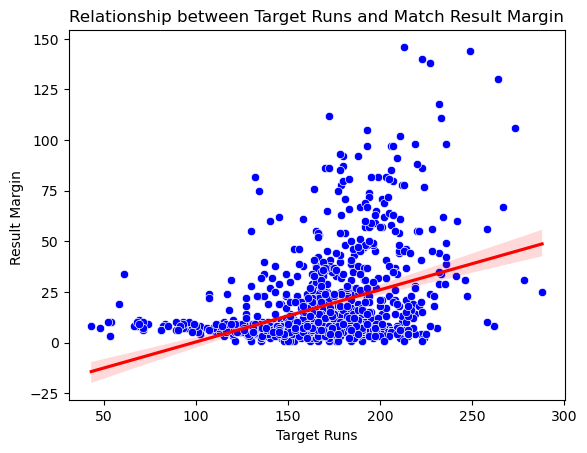

In [36]:
sns.scatterplot(x=df['target_runs'],y=df['result_margin'],color='blue')
sns.regplot(x=df['target_runs'],y=df['result_margin'],scatter=False, color='red')
plt.title('Relationship between Target Runs and Match Result Margin')
plt.xlabel('Target Runs')
plt.ylabel('Result Margin ')

# 8.Which team has won the most super overs?

In [37]:
df_w_super=df.groupby(['super_over','winner']).size()
df_w_super

super_over  winner                     
N           Chennai Super Kings            138
            Deccan Chargers                 29
            Delhi Capitals                  45
            Delhi Daredevils                67
            Gujarat Lions                   13
            Gujarat Titans                  28
            Kings XI Punjab                 85
            Kochi Tuskers Kerala             6
            Kolkata Knight Riders          130
            Lucknow Super Giants            24
            Mumbai Indians                 142
            Pune Warriors                   12
            Punjab Kings                    24
            Rajasthan Royals               110
            Rising Pune Supergiant          10
            Rising Pune Supergiants          5
            Royal Challengers Bangalore    114
            Royal Challengers Bengaluru      7
            Sunrisers Hyderabad             87
Y           Delhi Capitals                   3
            Kings XI

In [38]:
df_w_y = df_w_super.loc['Y'].reset_index().rename(columns={0: 'Won'})
df_w_y

,winner,Won
0,Delhi Capitals,3
1,Kings XI Punjab,3
2,Kolkata Knight Riders,1
3,Mumbai Indians,2
4,Rajasthan Royals,2
5,Royal Challengers Bangalore,2
6,Sunrisers Hyderabad,1


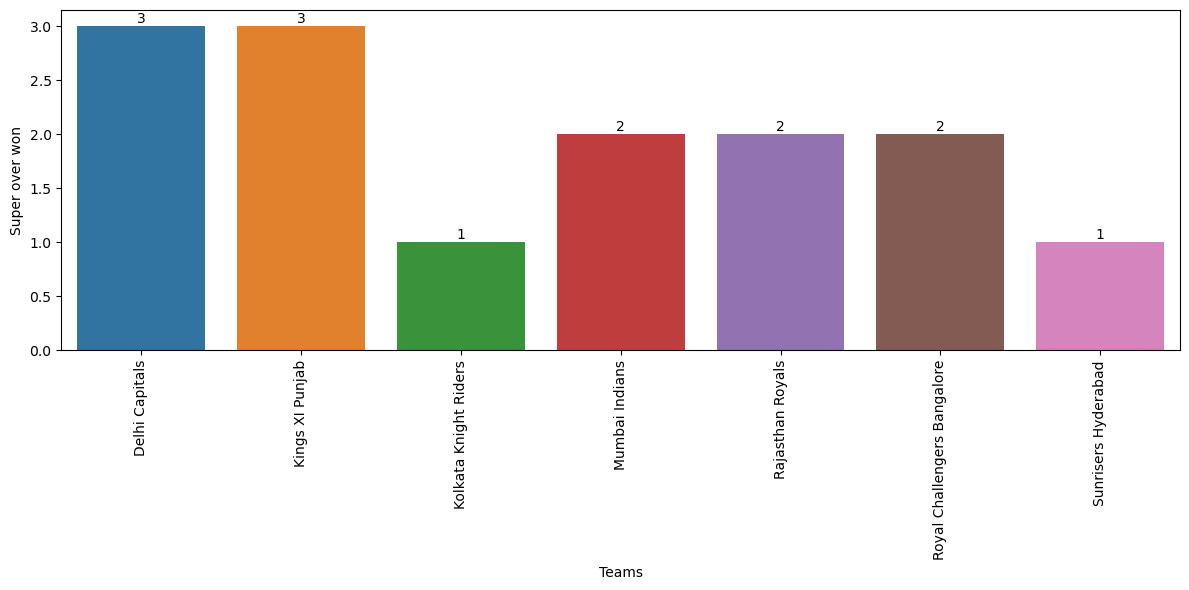

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x=df_w_y.winner, y=df_w_y.Won, data=df_w_y, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Super over won')
plt.tight_layout()
plt.show()


# 9.What is the distribution of dismissal types?

In [40]:
df_t_super=df.groupby(['super_over','toss_decision']).size()
df_t_super

super_over  toss_decision
N           bat              385
            field            696
Y           bat                6
            field              8
dtype: int64

In [41]:
df.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal,BF Bowden,K Hariharan
5,335987,2008,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,Normal,Aleem Dar,RB Tiffin
6,335988,2008,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,Normal,IL Howell,AM Saheba
7,335989,2008,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,Normal,DJ Harper,GA Pratapkumar
8,335990,2008,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,Normal,Asad Rauf,MR Benson
9,335991,2008,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,Normal,Aleem Dar,AM Saheba


In [42]:
df1=pd.read_csv('deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [43]:
df1['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [44]:
df_dis=df1['dismissal_kind'].dropna()

In [45]:
df_dis.unique()

array(['caught', 'bowled', 'run out', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field',
       'retired out'], dtype=object)

In [46]:
df_dis.value_counts()

caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: dismissal_kind, dtype: int64

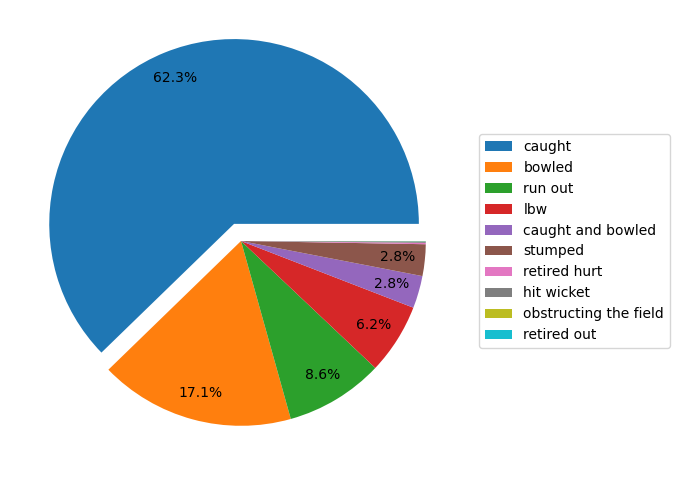

In [66]:
plt.figure(figsize=(12,6))
plt.pie(df_dis.value_counts(),autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',pctdistance=0.85, explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], textprops={'fontsize': 10})
plt.legend(df_dis.value_counts().index,loc="center left", bbox_to_anchor=(1, 0.5))

In [48]:
df2 = pd.merge(df, df1, how='left', left_on='id', right_on='match_id')
df2.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [49]:
df2.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

# 10.How does the scoring rate change over different seasons?

In [53]:
df_tot_run=df2.groupby(['season'])['total_runs'].sum().reset_index()
df_tot_run

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


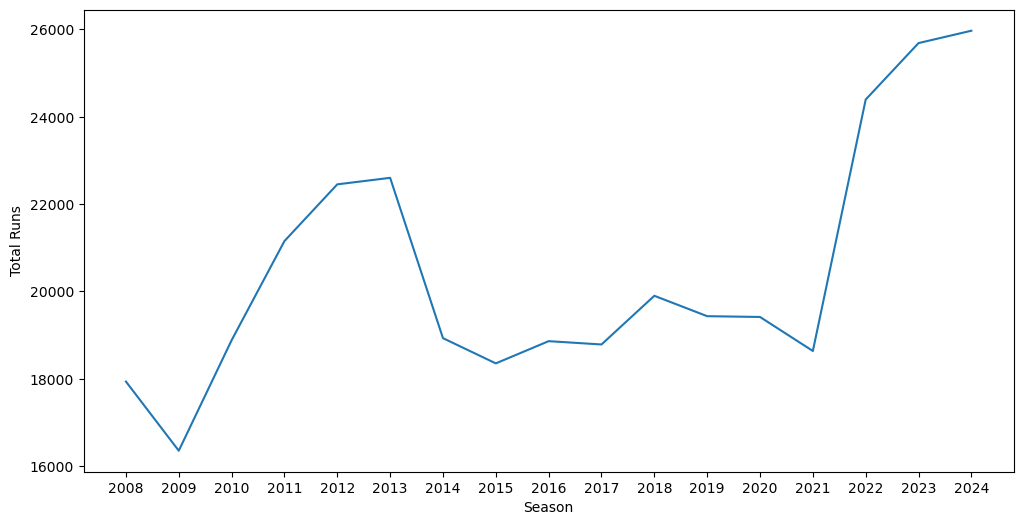

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df_tot_run['season'],df_tot_run['total_runs'])
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()